## ...

In [22]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Targets and Features Variables in my Model
- Variable(s) considered the target(s) for my model are: 
- Variable(s) considered the feature(s) for my model are:

# Step 1: Preprocess the data

In [23]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME", 'SPECIAL_CONSIDERATIONS'], axis = 1, inplace = True)
# application_df2

In [24]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,5000,1


In [25]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [26]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [27]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ('T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T15', 'T29', 'T17')

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [28]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1728        1
C5200        1
C2500        1
C1570        1
C2570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [29]:
# You may find it helpful to look at CLASSIFICATION value counts > 1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C2400        6
C1720        6
C4100        6
C1600        5
C1257        5
C1260        3
C2710        3
C0           3
C1256        2
C3200        2
C1234        2
C1267        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [30]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x < 1883]
classifications_to_replace = pd.DataFrame(classifications_to_replace)
classifications_to_replace = classifications_to_replace.index.to_list()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [31]:
application_df.nunique()

APPLICATION_TYPE       9
AFFILIATION            6
CLASSIFICATION         6
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [33]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_with_dummies = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT'],drop_first=True, dtype=float)
application_df_with_dummies

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Split our preprocessed data into our features and target arrays
X = application_df_with_dummies.drop(['IS_SUCCESSFUL'], axis=1)
y = application_df_with_dummies['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
X_train_scaled

array([[ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       [ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       [ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       ...,
       [ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       [ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       [ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932]])

In [37]:
X_test_scaled

array([[ 0.01394306, -0.03099144, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       [ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       [ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       ...,
       [ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       [ 0.01394306, -0.03091486, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932],
       [ 0.01394306, -0.03145581, -0.12439654, ..., -0.35060874,
        -0.06493162, -0.07126932]])

In [38]:
number_of_input_features = len(X_train.columns)
number_of_input_features

35

## Step 2: Compile, Train and Evaluate the Model

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim = number_of_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                360       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [46]:
# import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# define checkpoint path and filename
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Train the model
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    save_freq = 4000
)

fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6290 - accuracy: 0.6672
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5798 - accuracy: 0.7239
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5725 - accuracy: 0.7277
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5687 - accuracy: 0.7288
Epoch 5/50
755/804 [===========================>..] - ETA: 0s - loss: 0.5671 - accuracy: 0.7280
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5664 - accuracy: 0.7283
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5611 - accuracy: 0.7283
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5561 - accuracy: 0.7287
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5546 - accuracy: 0.7289
Epoch 9/50
804/804 [==============================] - 2s 2

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5543 - accuracy: 0.7272
Loss: 0.5542570352554321, Accuracy: 0.7272303104400635


<AxesSubplot:>

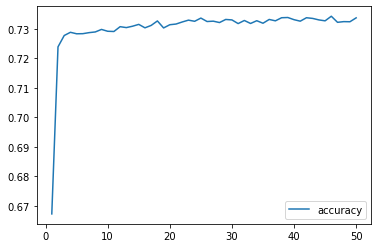

In [49]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [50]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')

# Step 3: Optimize the Model